Full name: ***Moldir Koishybayeva*** <br>

<h2 align="center"> <b>Mini Project</h4>

*This work was written in google colab.*<br>
*It will be appreciated if this platform will be used when running the code.*

**Importing libraries to call necessary functions**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
import pandas as pd
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers

*Uploading .csv file*

In [ ]:
load = files.upload()
df = pd.read_csv(io.BytesIO(load['bank-additional-full.csv']),delimiter=';')

Saving bank-additional-full.csv to bank-additional-full.csv


###**Exploratory Data Analysis (EDA)**

In [ ]:
print('\033[1m'+'Categorical:'+'\033[0m',len(list(df.select_dtypes(exclude=[np.number]))))
print(list(df.select_dtypes(exclude=[np.number])))
print('\033[1m'+'\nNumerical:'+'\033[0m',len(list(df.select_dtypes(include=[np.number]))))
print(list(df.select_dtypes(include=[np.number])))

Categorical: 11
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Numerical: 10
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


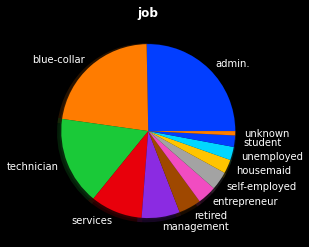

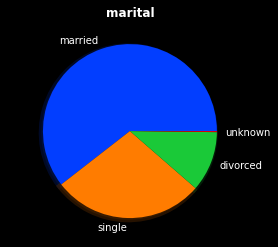

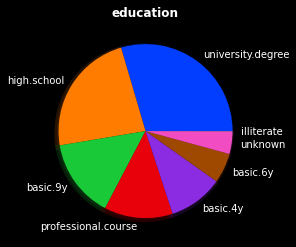

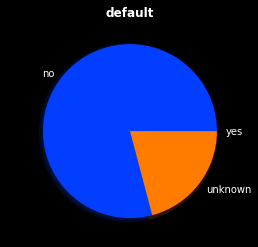

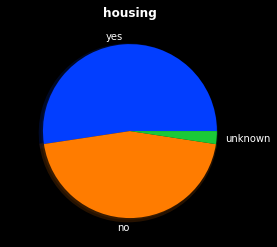

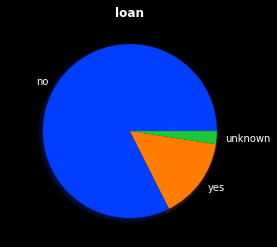

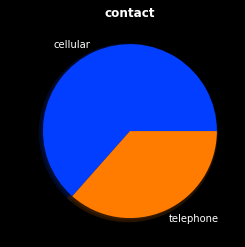

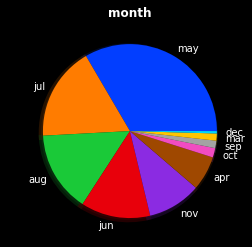

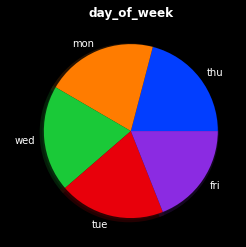

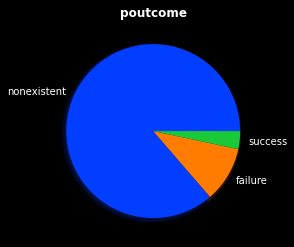

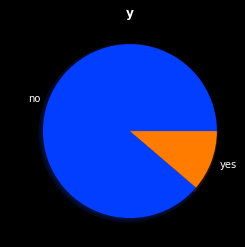

In [ ]:
for column in df.select_dtypes(exclude=[np.number]):
  plt.figure(figsize=(6,4),facecolor='black')
  plt.title(column, fontweight='bold',fontname='Helvetica',color='white')
  df[column].value_counts().plot(kind='pie',colors = sns.color_palette("bright"),shadow=True, textprops={'color':"w"},wedgeprops={'linewidth': 5, 'linestyle': 'solid'})

(array([1.6660e+03, 1.1343e+04, 1.2037e+04, 8.0870e+03, 5.8230e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


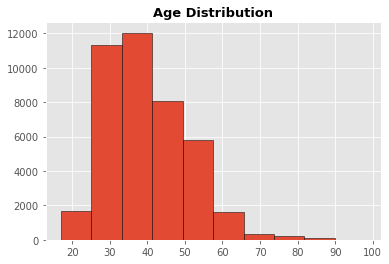

In [ ]:
plt.style.use('ggplot')
plt.title('Age Distribution', fontweight='bold',fontname='Helvetica',fontsize=13)
plt.hist(df.age, bins = 10, edgecolor = 'black')

###**Data Preparation**

####Unknown values  

In [ ]:
column_with_unknown = [column for column in df if 'unknown' in df[column].unique()]
for col in column_with_unknown:
  print('\033[1m'+col+'\033[0m'+':',len(df[df[col]=='unknown']))

job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [ ]:
pd.crosstab(df.education, df.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,77,2318,137,474,100,597,93,132,26,58,112,52
basic.6y,151,1426,71,77,85,75,25,226,13,87,34,22
basic.9y,499,3623,210,94,166,145,220,388,99,384,186,31
high.school,3329,878,234,174,298,276,118,2682,357,873,259,37
illiterate,1,8,2,1,0,3,3,0,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3320,142,12
university.degree,5753,94,610,139,2063,285,765,173,170,1809,262,45
unknown,249,454,57,42,123,98,29,150,167,212,19,131


In [ ]:
df.loc[(df['education']=='basic.4y') & (df['job'] == 'unknown'), 'job'] = 'blue-collar'
df.loc[(df['education']=='basic.6y') & (df['job'] == 'unknown'), 'job'] = 'blue-collar'
df.loc[(df['education']=='basic.9y') & (df['job'] == 'unknown'), 'job'] = 'blue-collar'
df.loc[(df['education']=='professional.course') & (df['job']=='unknown'), 'job'] = 'technician'
df.loc[(df['education']=='university.degree') & (df['job']=='unknown'), 'job'] = 'admin.'

In [ ]:
pd.crosstab(df.job, df.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5798,249
blue-collar,2370,1448,3654,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [ ]:
df.loc[(df['education']=='unknown') & (df['job']=='entrepreneur'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'professional.course'

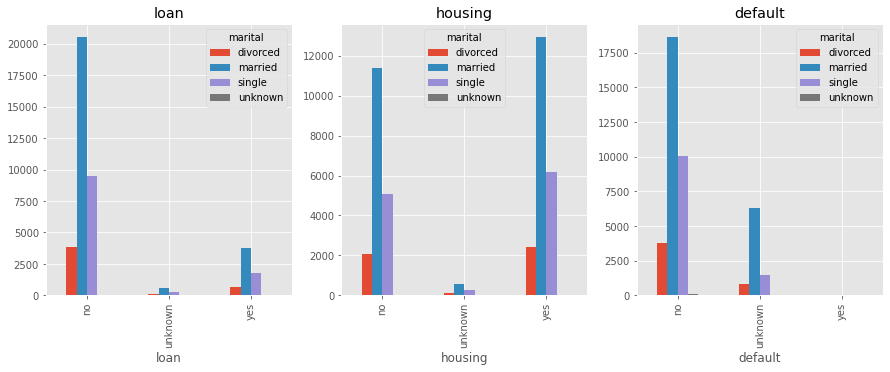

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
pd.crosstab(df.loan, df.marital).plot(ax=axes[0], kind='bar',title='loan')
pd.crosstab(df.housing, df.marital).plot(ax=axes[1], kind='bar', title='housing')
pd.crosstab(df.default, df.marital).plot(ax=axes[2],kind='bar',title='default')

In [ ]:
df['loan'] = df.loan.replace('unknown',df.loan.mode()[0])
df['default'] = df.default.replace('unknown',df.default.mode()[0])
df['housing']=df.housing.replace('unknown',df.housing.mode()[0],inplace=True)
df['pdays']=df.housing.replace('999',df[df['pdays'] < 999]['pdays'].mean(),inplace=True)

In [ ]:
df['y'].replace({'no':0,'yes':1},inplace=True)

####**Categorical -> Numerical**

In [ ]:
df_updated=pd.get_dummies(df)
df_updated

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


####**Features Correlation**

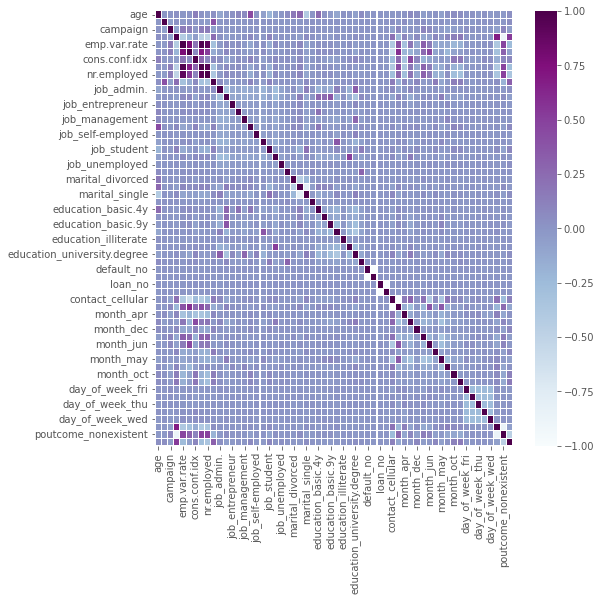

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_updated.corr(),cmap='BuPu',linewidths=0.05,ax=ax)

###**Model**

**<h4 align="center">**  ***Train & Test Datasets***</font><br>

In [ ]:
X = df_updated.drop(['y','duration'],1)
y = df_updated['y']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**<h4 align="center"> *Train Neural Network Model*</font>**

In [ ]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(X.shape[1],)))
network.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]) 

In [ ]:
history = network.fit(X_train, y_train, epochs=12, verbose=1,batch_size=100, validation_data=(X_test, y_test))

Epoch 1/12
330/330 [==============================] - 2s 3ms/step - loss: 54.1927 - accuracy: 0.7370 - val_loss: 7.0678 - val_accuracy: 0.1157
Epoch 2/12
330/330 [==============================] - 1s 2ms/step - loss: 6.0705 - accuracy: 0.7873 - val_loss: 11.5309 - val_accuracy: 0.8865
Epoch 3/12
 32/330 [=>............................] - ETA: 0s - loss: 6.6038 - accuracy: 0.7934 

###**Performance of the Model - Visualization**

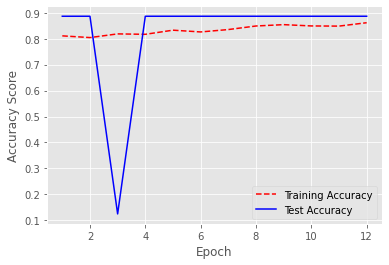

In [ ]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss) + 1)
training_accuracy = history.history['accuracy']
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

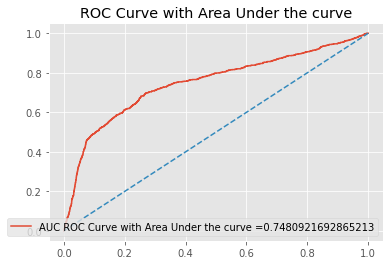

In [ ]:
import sklearn.metrics as metrics
predicted_target = network.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,  predicted_target)
auc = metrics.roc_auc_score(y_test, predicted_target)
plt.title('ROC Curve with Area Under the curve')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

###**Network Architecture Visualization**

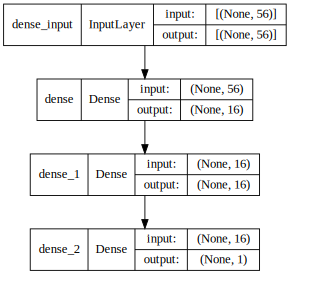

In [ ]:
SVG(model_to_dot(network, show_shapes=True, show_layer_names=True, dpi=65).create(prog="dot", format="svg"))